總行數: 3
處理行數: 0
相對到達時間: 73500
檔案名稱: xa.s12.00.mhz.1970-01-19HR00_evid00002
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002_arrival_plot.png


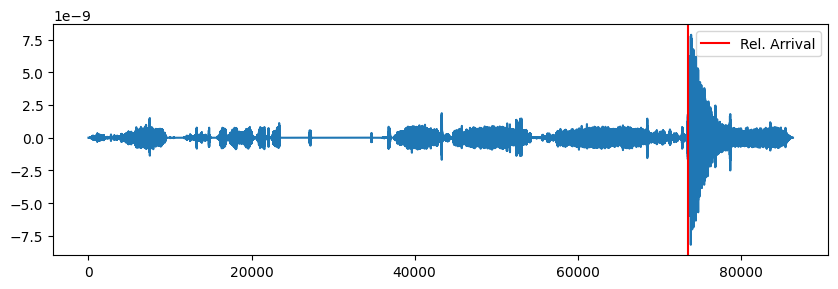

處理行數: 1
相對到達時間: 12720
檔案名稱: xa.s12.00.mhz.1970-03-25HR00_evid00003
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003_arrival_plot.png


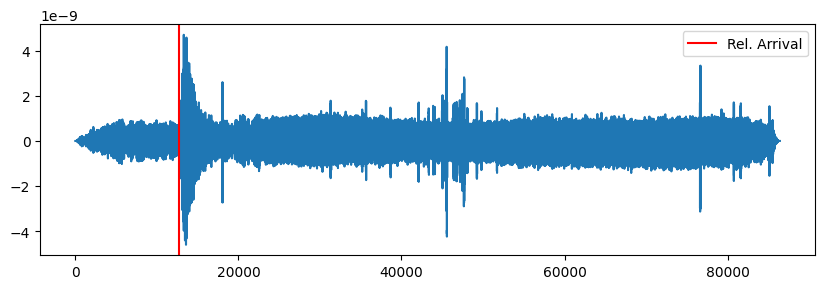

處理行數: 2
相對到達時間: 73020
檔案名稱: xa.s12.00.mhz.1970-03-26HR00_evid00004
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-26HR00_evid00004_arrival_plot.png


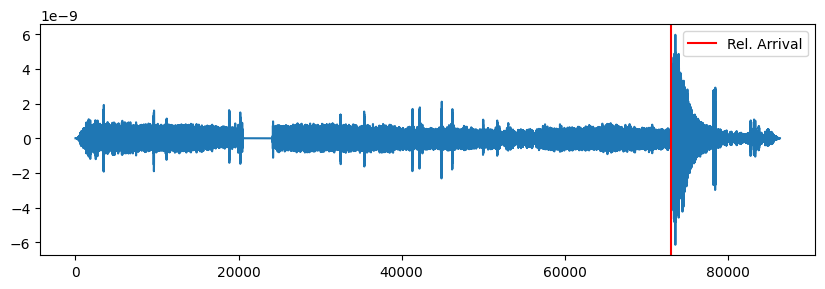

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os

# 目錄和檔案設定
cat_directory = './data/lunar/training/catalogs/'
cat_file = os.path.join(cat_directory, 'apollo12_catalog_GradeA_final.csv')

# 讀取地震目錄
cat = pd.read_csv(cat_file)

# 設定處理的行數 (可以改成 len(cat) 來處理所有行)
row_count = 3 # or len(cat)
print(f"總行數: {row_count}")

# 迴圈處理每一行
for i in range(row_count):
    print(f"處理行數: {i}")
    
    # 讀取目錄中的一行資料
    row = cat.iloc[i]
    
    # 取得到達時間
    arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], '%Y-%m-%dT%H:%M:%S.%f')
    
    # 取得相對到達時間
    arrival_time_rel = row['time_rel(sec)']
    print(f"相對到達時間: {arrival_time_rel}")
    
    # 取得檔案名稱
    test_filename = row['filename']
    print(f"檔案名稱: {test_filename}")

    # 設定資料檔案的目錄
    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = os.path.join(data_directory, f'{test_filename}.csv')
    
    # 讀取震波資料
    data_cat = pd.read_csv(csv_file)

    # 取得時間和速度資料
    csv_times = np.array(data_cat['time_rel(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(m/s)'].tolist())

    # 畫圖並顯示震波和到達時間
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    ax.plot(csv_times, csv_data)
    
    # 顯示到達時間的紅線
    arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    
    # 設定圖例
    ax.legend(handles=[arrival_line])

    # 保存圖像 (可選)
    save_path = os.path.join(data_directory, f'{test_filename}_arrival_plot.png')
    plt.savefig(save_path)
    print(f"圖像已保存: {save_path}")

    # 顯示圖像
    plt.show()



# Data augment : Zoom in/out singal time series

總行數: 3
處理行數: 0
相對到達時間: 73500
檔案名稱: xa.s12.00.mhz.1970-01-19HR00_evid00002
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002_interpolated_arrival_plot.png


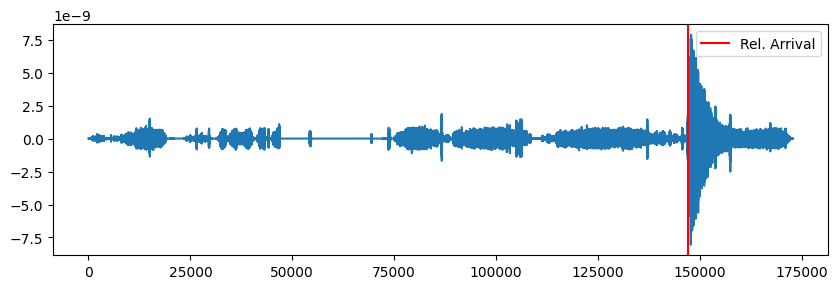

插值後的數據已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002_interpolated.csv
處理行數: 1
相對到達時間: 12720
檔案名稱: xa.s12.00.mhz.1970-03-25HR00_evid00003
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003_interpolated_arrival_plot.png


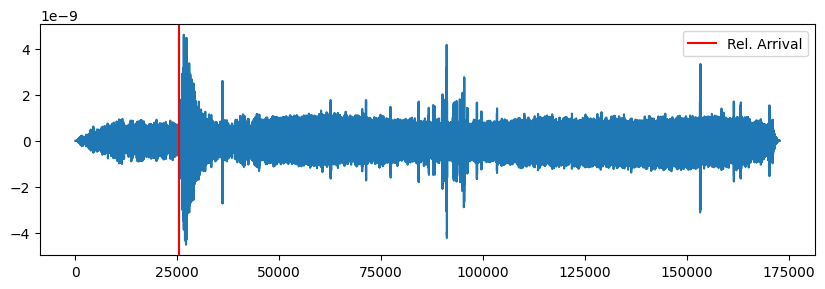

插值後的數據已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003_interpolated.csv
處理行數: 2
相對到達時間: 73020
檔案名稱: xa.s12.00.mhz.1970-03-26HR00_evid00004
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-26HR00_evid00004_interpolated_arrival_plot.png


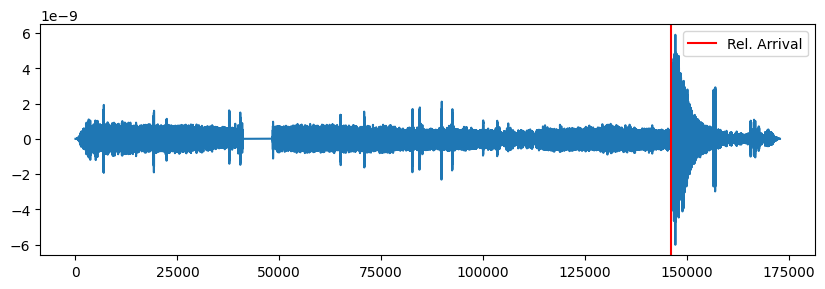

插值後的數據已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-26HR00_evid00004_interpolated.csv


In [21]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d

# 目錄和檔案設定
cat_directory = './data/lunar/training/catalogs/'
cat_file = os.path.join(cat_directory, 'apollo12_catalog_GradeA_final.csv')

# 讀取地震目錄
cat = pd.read_csv(cat_file)

# 設定處理的行數 (可以改成 len(cat) 來處理所有行)
row_count = 3 # or len(cat)
print(f"總行數: {row_count}")

# 迴圈處理每一行
for i in range(row_count):
    print(f"處理行數: {i}")
    
    # 讀取目錄中的一行資料
    row = cat.iloc[i]
    
    # 取得到達時間
    arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], '%Y-%m-%dT%H:%M:%S.%f')
    
    # 取得相對到達時間
    arrival_time_rel = row['time_rel(sec)']
    print(f"相對到達時間: {arrival_time_rel}")
    
    # 取得檔案名稱
    test_filename = row['filename']
    print(f"檔案名稱: {test_filename}")

    # 設定資料檔案的目錄
    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = os.path.join(data_directory, f'{test_filename}.csv')
    
    # 讀取震波資料
    data_cat = pd.read_csv(csv_file)

    # 取得時間和速度資料
    csv_times = np.array(data_cat['time_rel(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(m/s)'].tolist())

    # 使用線性插值來插值數據 (2 倍插值)
    interp_func = interp1d(csv_times, csv_data, kind='linear')

    # 設定新的時間範圍，將時間延長 2 倍，並在該範圍內生成更多數據點
    new_time = np.linspace(csv_times.min(), csv_times.max() * 2, len(csv_times) * 2)
    new_data = interp_func(np.linspace(csv_times.min(), csv_times.max(), len(csv_times) * 2))

    # 畫圖並顯示震波和到達時間
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    ax.plot(new_time, new_data, label='Interpolated Signal')

    # 顯示到達時間的紅線 (需要調整到新的時間軸)
    arrival_line = ax.axvline(x=arrival_time_rel * 2, c='red', label='Rel. Arrival')

    # 設定圖例
    ax.legend(handles=[arrival_line])

    # 保存圖像 (可選)
    save_path = os.path.join(data_directory, f'{test_filename}_interpolated_arrival_plot.png')
    plt.savefig(save_path)
    print(f"圖像已保存: {save_path}")

    # 顯示圖像
    plt.show()

    # 保存插值後的數據
    interpolated_df = pd.DataFrame({'time_rel(sec)': new_time, 'velocity(m/s)': new_data})
    interpolated_save_path = os.path.join(data_directory, f'{test_filename}_interpolated.csv')
    interpolated_df.to_csv(interpolated_save_path, index=False)
    print(f"插值後的數據已保存: {interpolated_save_path}")


總行數: 3
處理行數: 0
相對到達時間: 73500
檔案名稱: xa.s12.00.mhz.1970-01-19HR00_evid00002
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002_interpolated_arrival_plot_half_time.png


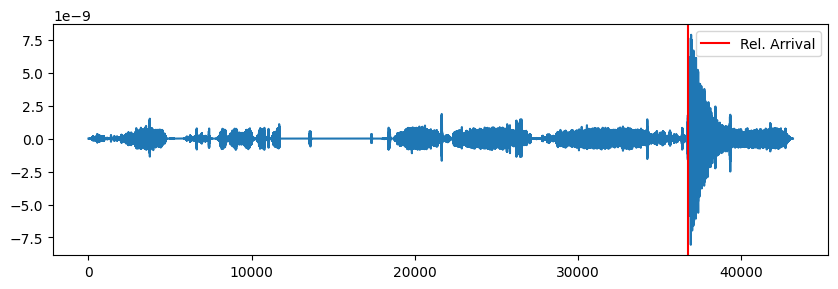

插值後的數據已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002_interpolated_half_time.csv
處理行數: 1
相對到達時間: 12720
檔案名稱: xa.s12.00.mhz.1970-03-25HR00_evid00003
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003_interpolated_arrival_plot_half_time.png


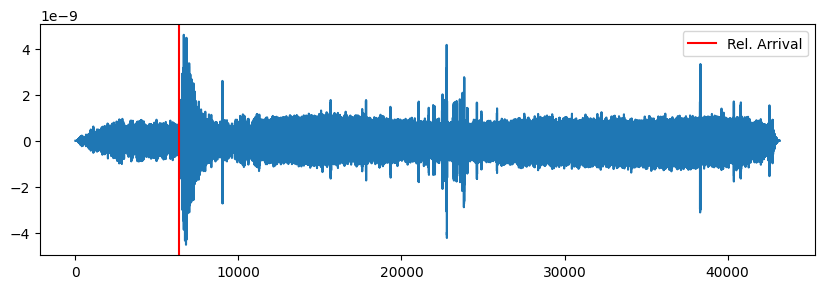

插值後的數據已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003_interpolated_half_time.csv
處理行數: 2
相對到達時間: 73020
檔案名稱: xa.s12.00.mhz.1970-03-26HR00_evid00004
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-26HR00_evid00004_interpolated_arrival_plot_half_time.png


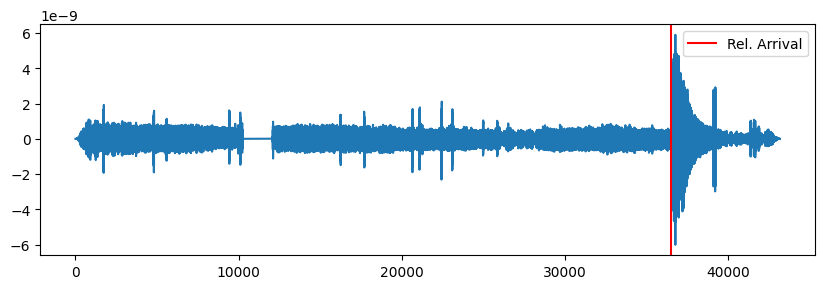

插值後的數據已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-26HR00_evid00004_interpolated_half_time.csv


In [22]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d

# 目錄和檔案設定
cat_directory = './data/lunar/training/catalogs/'
cat_file = os.path.join(cat_directory, 'apollo12_catalog_GradeA_final.csv')

# 讀取地震目錄
cat = pd.read_csv(cat_file)

# 設定處理的行數 (可以改成 len(cat) 來處理所有行)
row_count = 3 # or len(cat)
print(f"總行數: {row_count}")

# 迴圈處理每一行
for i in range(row_count):
    print(f"處理行數: {i}")
    
    # 讀取目錄中的一行資料
    row = cat.iloc[i]
    
    # 取得到達時間
    arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], '%Y-%m-%dT%H:%M:%S.%f')
    
    # 取得相對到達時間
    arrival_time_rel = row['time_rel(sec)']
    print(f"相對到達時間: {arrival_time_rel}")
    
    # 取得檔案名稱
    test_filename = row['filename']
    print(f"檔案名稱: {test_filename}")

    # 設定資料檔案的目錄
    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = os.path.join(data_directory, f'{test_filename}.csv')
    
    # 讀取震波資料
    data_cat = pd.read_csv(csv_file)

    # 取得時間和速度資料
    csv_times = np.array(data_cat['time_rel(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(m/s)'].tolist())

    # 使用線性插值來插值數據 (2 倍插值)
    interp_func = interp1d(csv_times, csv_data, kind='linear')

    # 設定新的時間範圍，將時間縮短一半，並在該範圍內生成更多數據點
    new_time = np.linspace(csv_times.min(), csv_times.max() / 2, len(csv_times) * 2)
    new_data = interp_func(np.linspace(csv_times.min(), csv_times.max(), len(csv_times) * 2))

    # 畫圖並顯示震波和到達時間
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    ax.plot(new_time, new_data, label='Interpolated Signal')

    # 顯示到達時間的紅線 (需要調整到新的時間軸)
    arrival_line = ax.axvline(x=arrival_time_rel / 2, c='red', label='Rel. Arrival')

    # 設定圖例
    ax.legend(handles=[arrival_line])

    # 保存圖像 (可選)
    save_path = os.path.join(data_directory, f'{test_filename}_interpolated_arrival_plot_half_time.png')
    plt.savefig(save_path)
    print(f"圖像已保存: {save_path}")

    # 顯示圖像
    plt.show()

    # 保存插值後的數據
    interpolated_df = pd.DataFrame({'time_rel(sec)': new_time, 'velocity(m/s)': new_data})
    interpolated_save_path = os.path.join(data_directory, f'{test_filename}_interpolated_half_time.csv')
    interpolated_df.to_csv(interpolated_save_path, index=False)
    print(f"插值後的數據已保存: {interpolated_save_path}")


# Compress Data

總行數: 3
處理行數: 0
相對到達時間: 73500
檔案名稱: xa.s12.00.mhz.1970-01-19HR00_evid00002
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002_comparison_plot.png


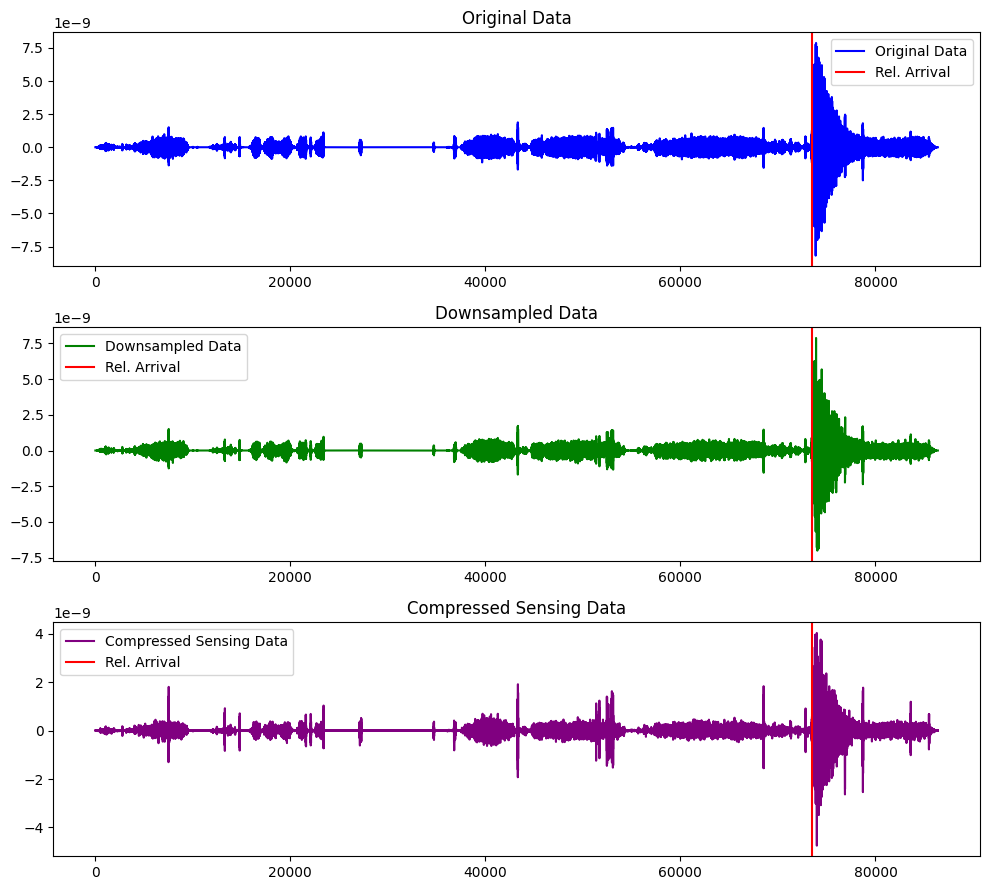

處理行數: 1
相對到達時間: 12720
檔案名稱: xa.s12.00.mhz.1970-03-25HR00_evid00003
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003_comparison_plot.png


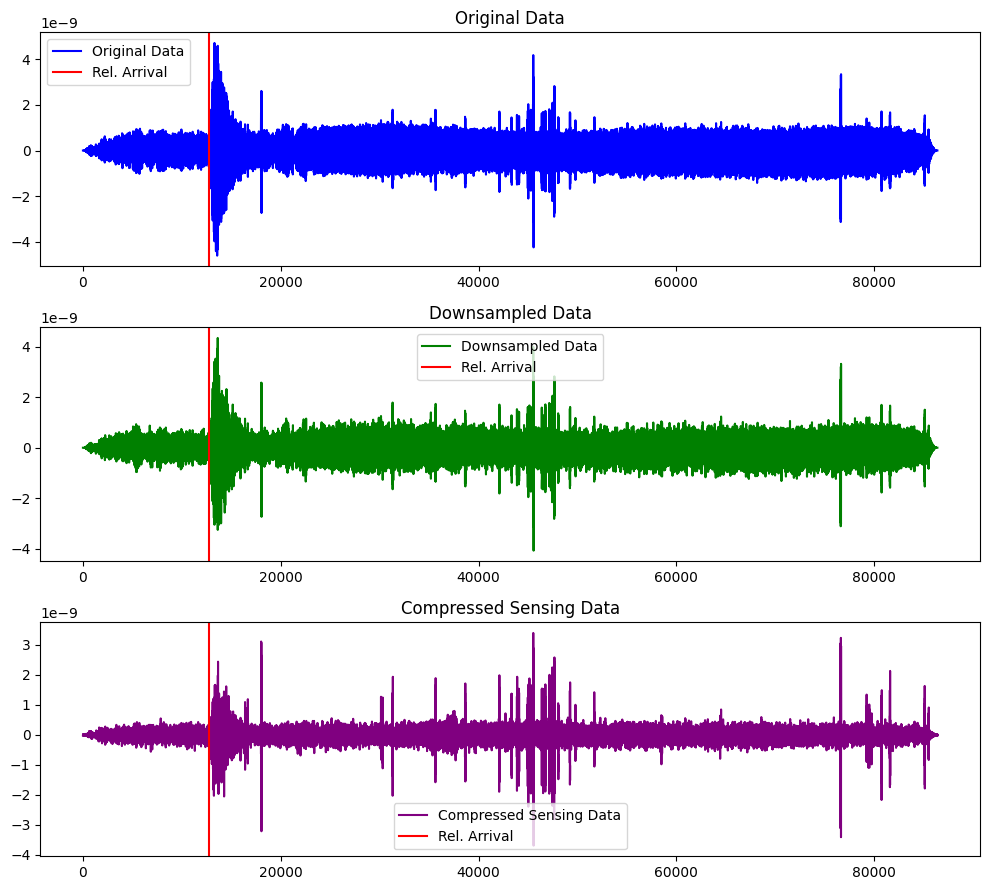

處理行數: 2
相對到達時間: 73020
檔案名稱: xa.s12.00.mhz.1970-03-26HR00_evid00004
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-26HR00_evid00004_comparison_plot.png


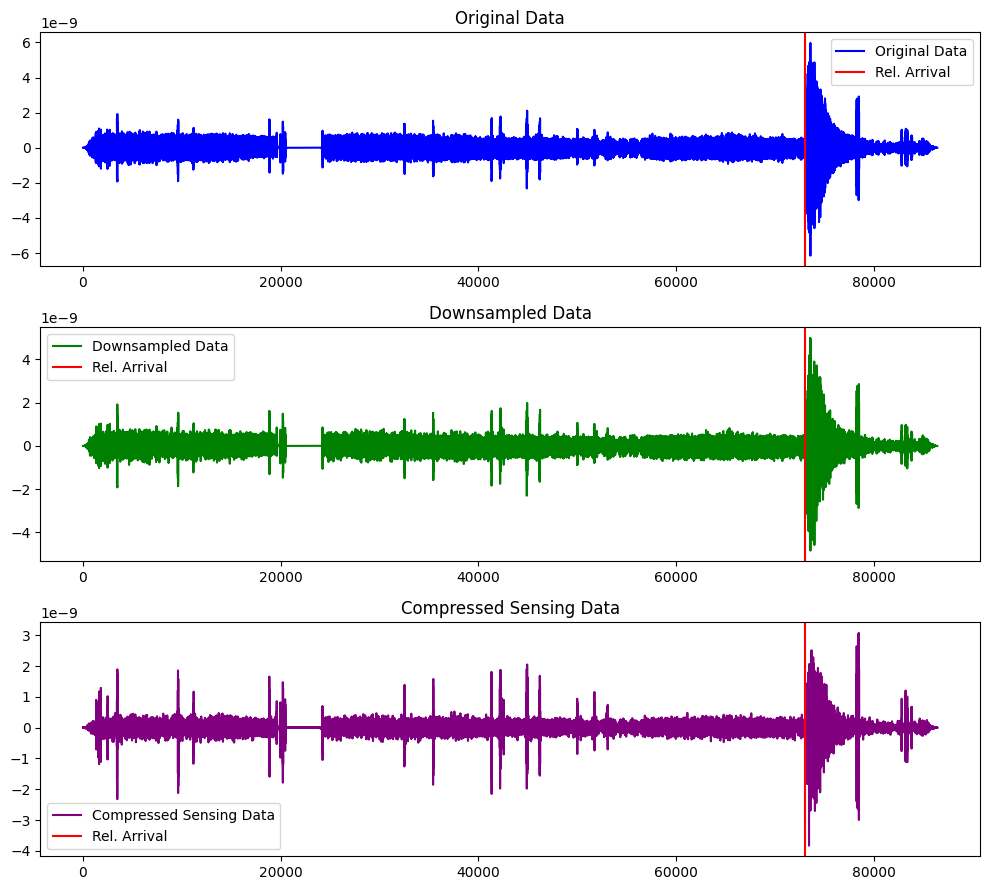

In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os
from scipy.fftpack import dct, idct

# 目錄和檔案設定
cat_directory = './data/lunar/training/catalogs/'
cat_file = os.path.join(cat_directory, 'apollo12_catalog_GradeA_final.csv')

# 讀取地震目錄
cat = pd.read_csv(cat_file)

# 壓縮感知函數
def apply_compressed_sensing(data, compression_rate):
    signal_length = len(data)
    dct_coefficients = dct(data, norm='ortho')

    # 保留前 k 個係數
    k = int(signal_length * compression_rate)
    compressed_signal = np.zeros_like(dct_coefficients)
    compressed_signal[:k] = dct_coefficients[:k]

    # 使用 IDCT 重建壓縮訊號
    reconstructed_signal = idct(compressed_signal, norm='ortho')
    return reconstructed_signal

# 下采樣函數
def downsample_data(times, data, downsample_rate):
    downsampled_times = times[::downsample_rate]
    downsampled_data = data[::downsample_rate]
    return downsampled_times, downsampled_data

# 設定處理的行數 (可以改成 len(cat) 來處理所有行)
row_count = 3 # or len(cat)
print(f"總行數: {row_count}")

# 下采樣和壓縮感知的參數
downsample_rate = 10  # 下采樣的比例
compression_rate = 0.5  # 壓縮感知的比例

# 迴圈處理每一行
for i in range(row_count):
    print(f"處理行數: {i}")
    
    # 讀取目錄中的一行資料
    row = cat.iloc[i]
    
    # 取得到達時間
    arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], '%Y-%m-%dT%H:%M:%S.%f')
    
    # 取得相對到達時間
    arrival_time_rel = row['time_rel(sec)']
    print(f"相對到達時間: {arrival_time_rel}")
    
    # 取得檔案名稱
    test_filename = row['filename']
    print(f"檔案名稱: {test_filename}")

    # 設定資料檔案的目錄
    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = os.path.join(data_directory, f'{test_filename}.csv')
    
    # 讀取震波資料
    data_cat = pd.read_csv(csv_file)

    # 取得時間和速度資料
    csv_times = np.array(data_cat['time_rel(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(m/s)'].tolist())

    # 下采樣
    downsampled_times, downsampled_data = downsample_data(csv_times, csv_data, downsample_rate)

    # 應用壓縮感知
    compressed_data = apply_compressed_sensing(downsampled_data, compression_rate)

    # 分別顯示原始資料、下采樣後的資料、壓縮感知後的資料
    fig, axs = plt.subplots(3, 1, figsize=(10, 9))

    # 原始資料
    axs[0].plot(csv_times, csv_data, label='Original Data', color='blue')
    axs[0].axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    axs[0].set_title('Original Data')
    axs[0].legend()

    # 下采樣後的資料
    axs[1].plot(downsampled_times, downsampled_data, label='Downsampled Data', color='green')
    axs[1].axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    axs[1].set_title('Downsampled Data')
    axs[1].legend()

    # 壓縮感知後的資料
    axs[2].plot(downsampled_times, compressed_data, label='Compressed Sensing Data', color='purple')
    axs[2].axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    axs[2].set_title('Compressed Sensing Data')
    axs[2].legend()

    # 調整子圖間距
    plt.tight_layout()

    # 保存圖像 (可選)
    save_path = os.path.join(data_directory, f'{test_filename}_comparison_plot.png')
    plt.savefig(save_path)
    print(f"圖像已保存: {save_path}")

    # 顯示圖像
    plt.show()


# Filter Data noise

總行數: 3
處理行數: 0
檔案名稱: xa.s12.00.mhz.1970-01-19HR00_evid00002
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002_filtered_images.png


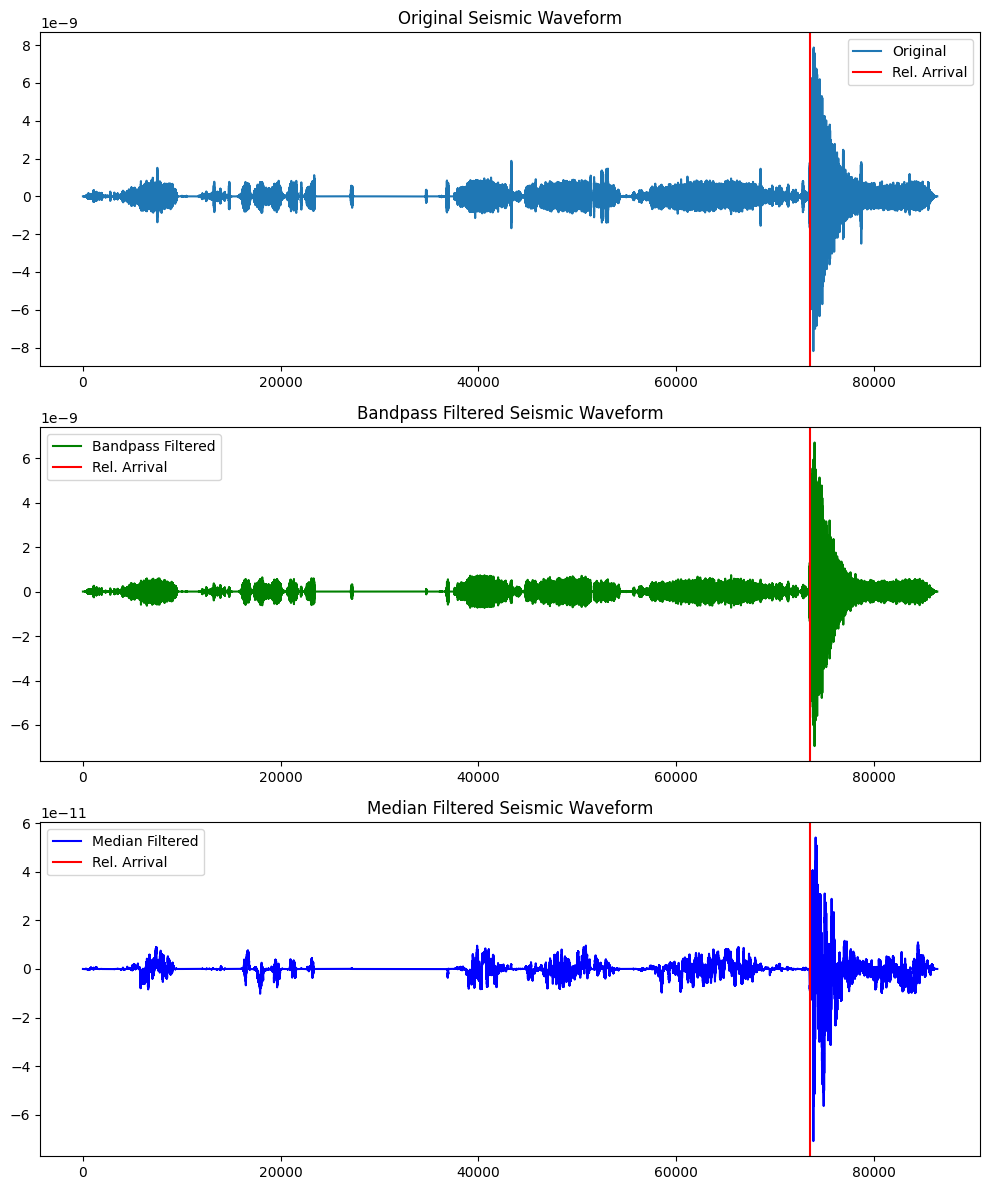

處理行數: 1
檔案名稱: xa.s12.00.mhz.1970-03-25HR00_evid00003
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003_filtered_images.png


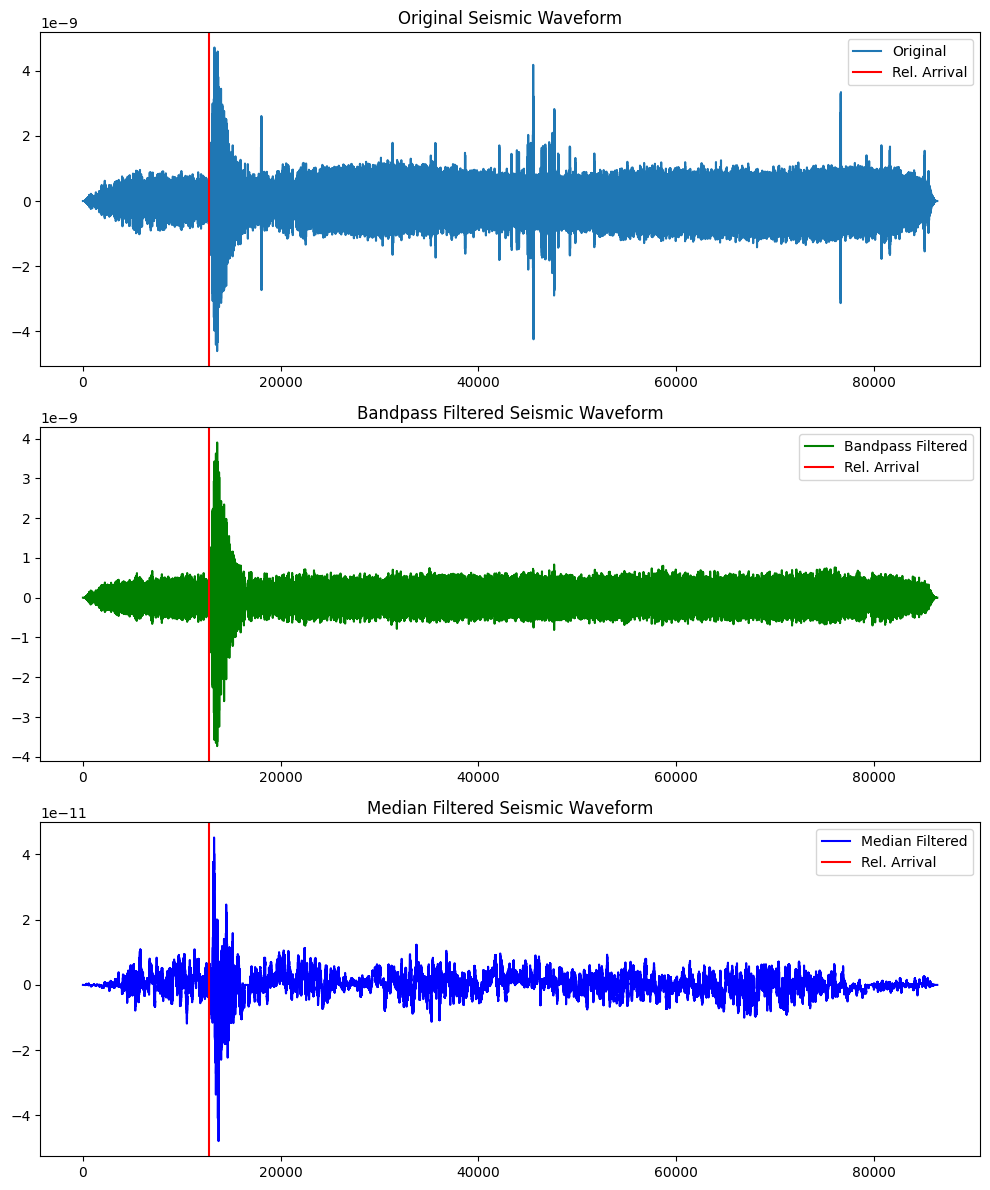

處理行數: 2
檔案名稱: xa.s12.00.mhz.1970-03-26HR00_evid00004
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-26HR00_evid00004_filtered_images.png


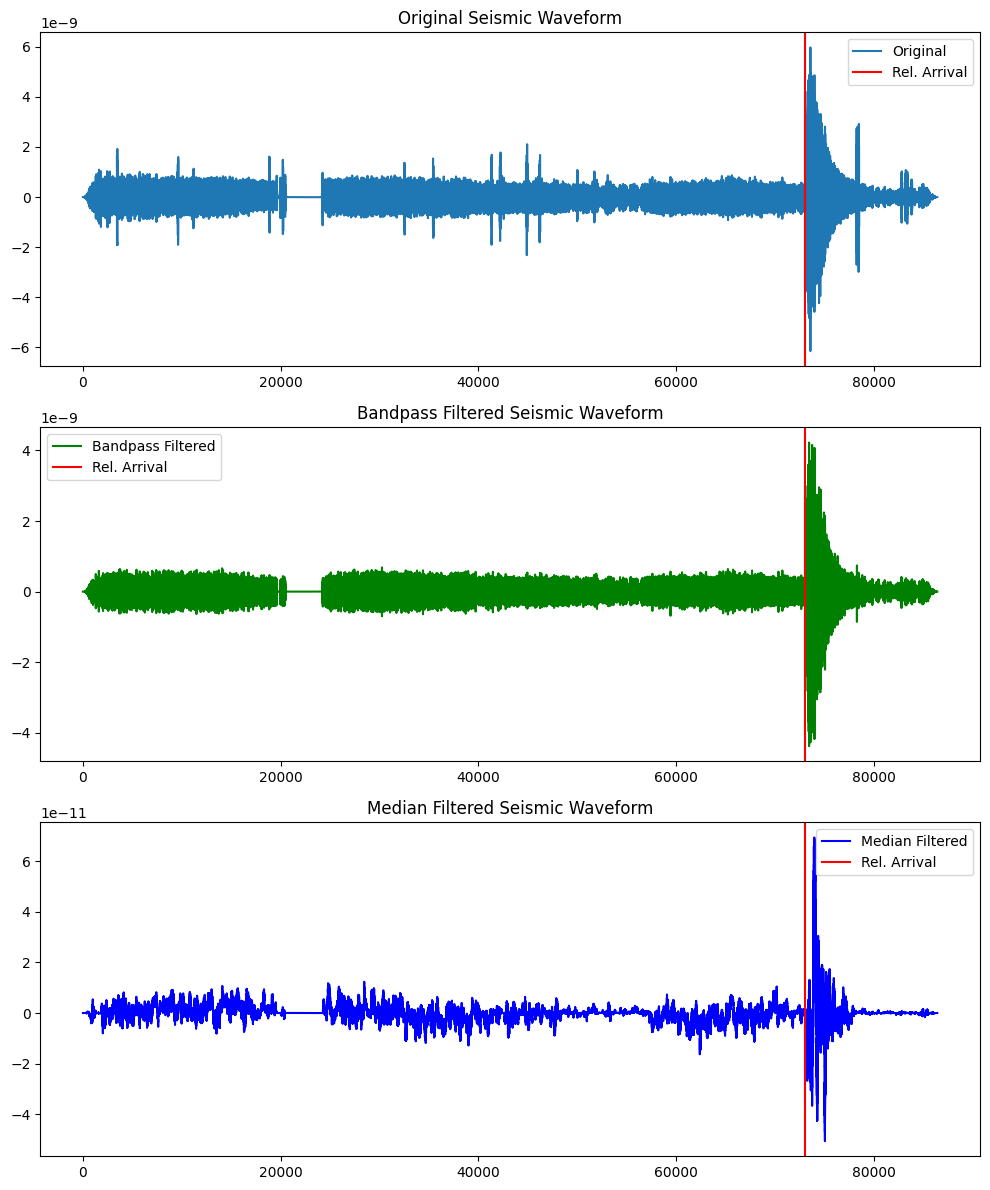

In [7]:
from scipy.signal import medfilt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os
from obspy import read, Trace, UTCDateTime

# 目錄和檔案設定
cat_directory = './data/lunar/training/catalogs/'
cat_file = os.path.join(cat_directory, 'apollo12_catalog_GradeA_final.csv')

# 讀取地震目錄
cat = pd.read_csv(cat_file)

# 設定處理的行數
row_count = 3 #len(cat)
print(f"總行數: {row_count}")

# 設定濾波的最小和最大頻率
minfreq = 1.5
maxfreq = 3.0
Fs = 6.625  # 取樣率
nyquist = Fs / 2
minfreq_norm = minfreq / nyquist
maxfreq_norm = maxfreq / nyquist

# 中值濾波窗口大小
window_size = 1001

# 迴圈處理每一行
for i in range(row_count):
    print(f"處理行數: {i}")
    
    row = cat.iloc[i]
    arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], '%Y-%m-%dT%H:%M:%S.%f')
    arrival_time_rel = row['time_rel(sec)']
    test_filename = row['filename']
    print(f"檔案名稱: {test_filename}")

    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = os.path.join(data_directory, f'{test_filename}.csv')
    data_cat = pd.read_csv(csv_file)

    csv_times = np.array(data_cat['time_rel(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(m/s)'].tolist())

    # 將數據轉換為 Trace 進行 bandpass 濾波
    trace = Trace(data=csv_data)
    trace.stats.starttime = UTCDateTime(arrival_time)
    trace.stats.sampling_rate = Fs
    trace.filter('bandpass', freqmin=minfreq_norm, freqmax=maxfreq_norm)

    # 將 bandpass 濾波後的數據進行中值濾波
    filtered_data = medfilt(trace.data, window_size)

    # 畫圖
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

    # 原始波形
    ax1.plot(csv_times, csv_data, label='Original')
    ax1.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    ax1.set_title('Original Seismic Waveform')
    ax1.legend()

    # Bandpass 濾波後的波形
    ax2.plot(csv_times, trace.data, label='Bandpass Filtered', color='green')
    ax2.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    ax2.set_title('Bandpass Filtered Seismic Waveform')
    ax2.legend()

    # 中值濾波後的波形
    ax3.plot(csv_times, filtered_data, label='Median Filtered', color='blue')
    ax3.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    ax3.set_title('Median Filtered Seismic Waveform')
    ax3.legend()

    # 保存圖像
    save_path = os.path.join(data_directory, f'{test_filename}_filtered_images.png')
    plt.savefig(save_path)
    print(f"圖像已保存: {save_path}")

    plt.tight_layout()
    plt.show()


總行數: 3
處理行數: 0
檔案名稱: xa.s12.00.mhz.1970-01-19HR00_evid00002
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002_filtered_images.png


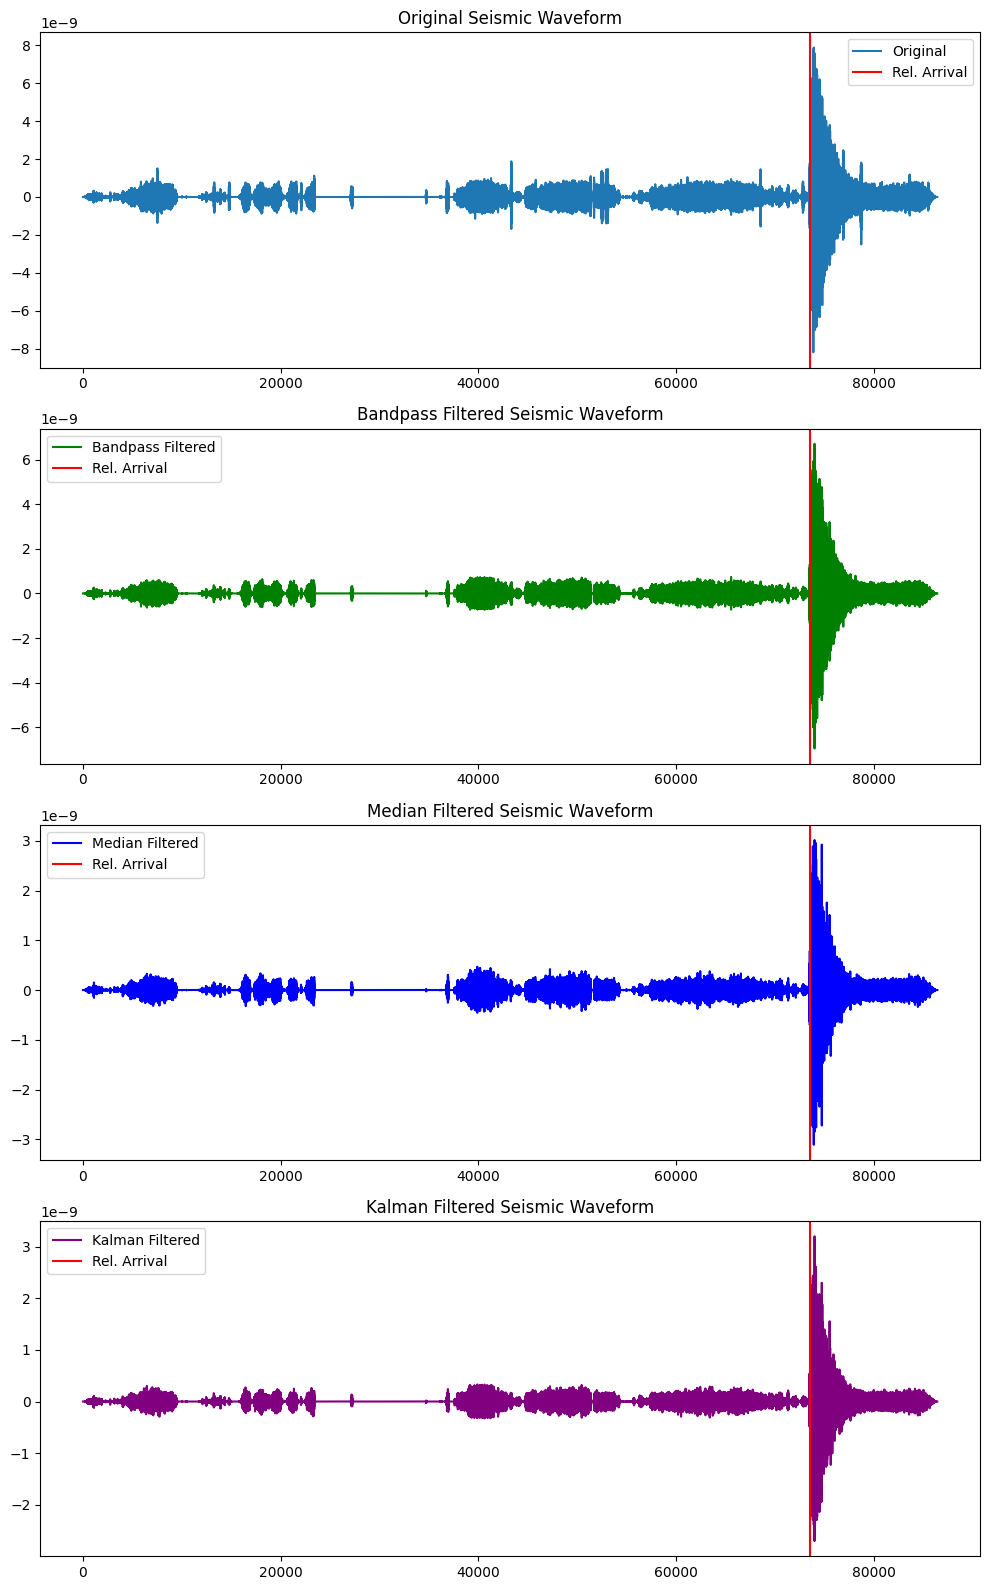

處理行數: 1
檔案名稱: xa.s12.00.mhz.1970-03-25HR00_evid00003
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003_filtered_images.png


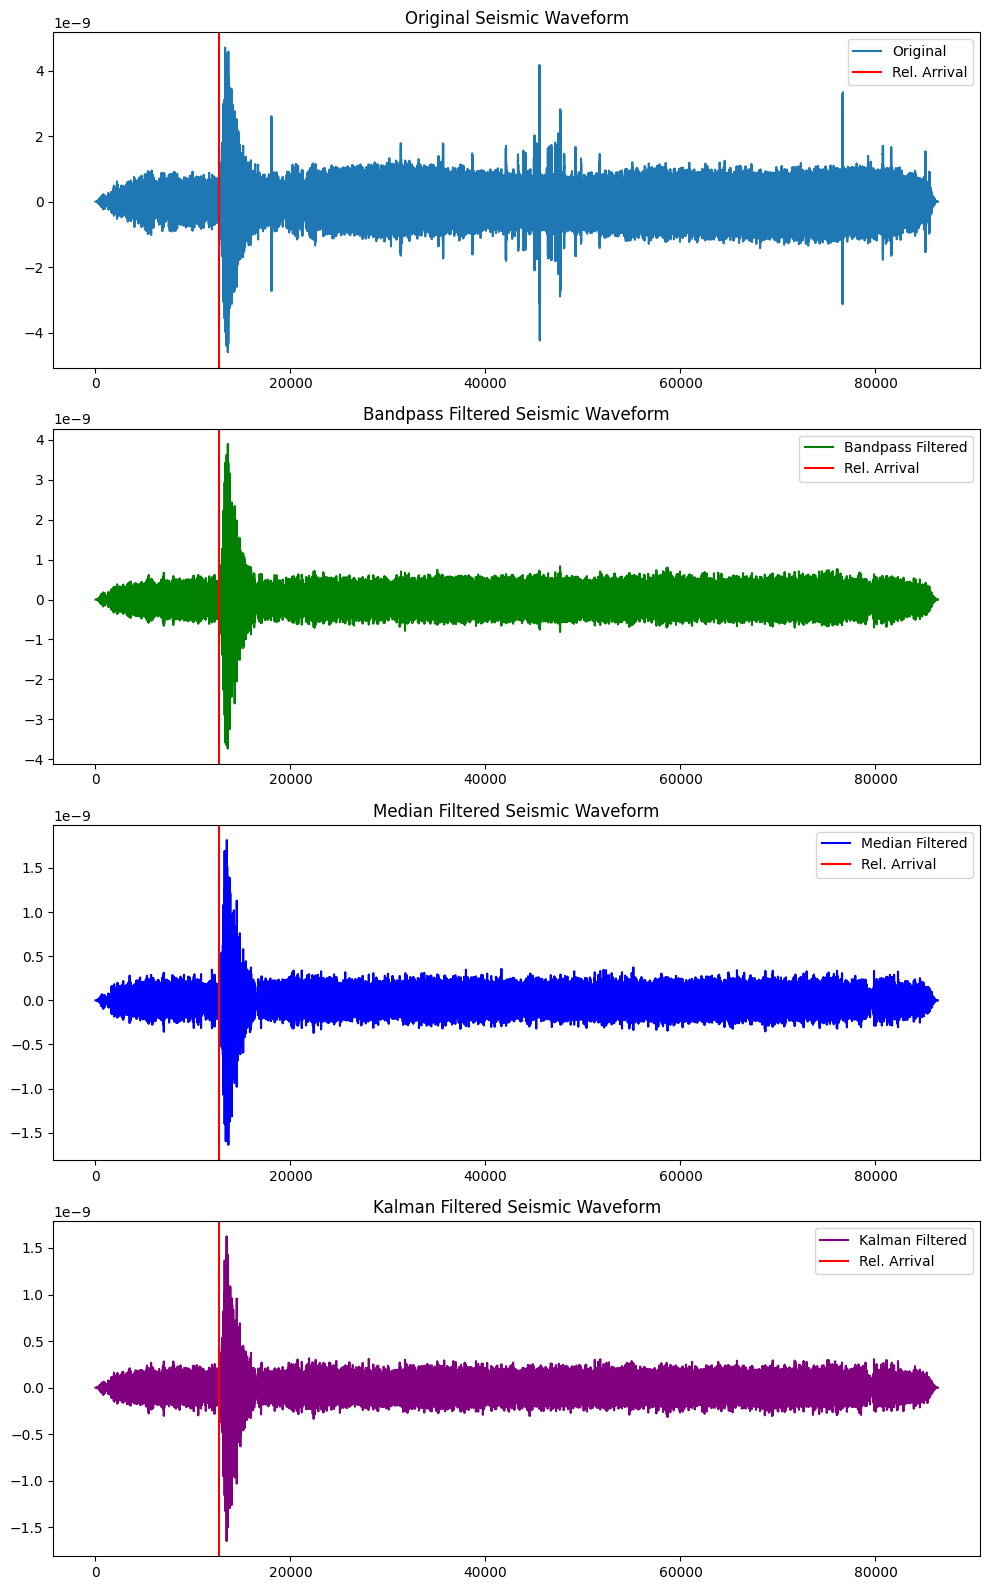

處理行數: 2
檔案名稱: xa.s12.00.mhz.1970-03-26HR00_evid00004
圖像已保存: ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-26HR00_evid00004_filtered_images.png


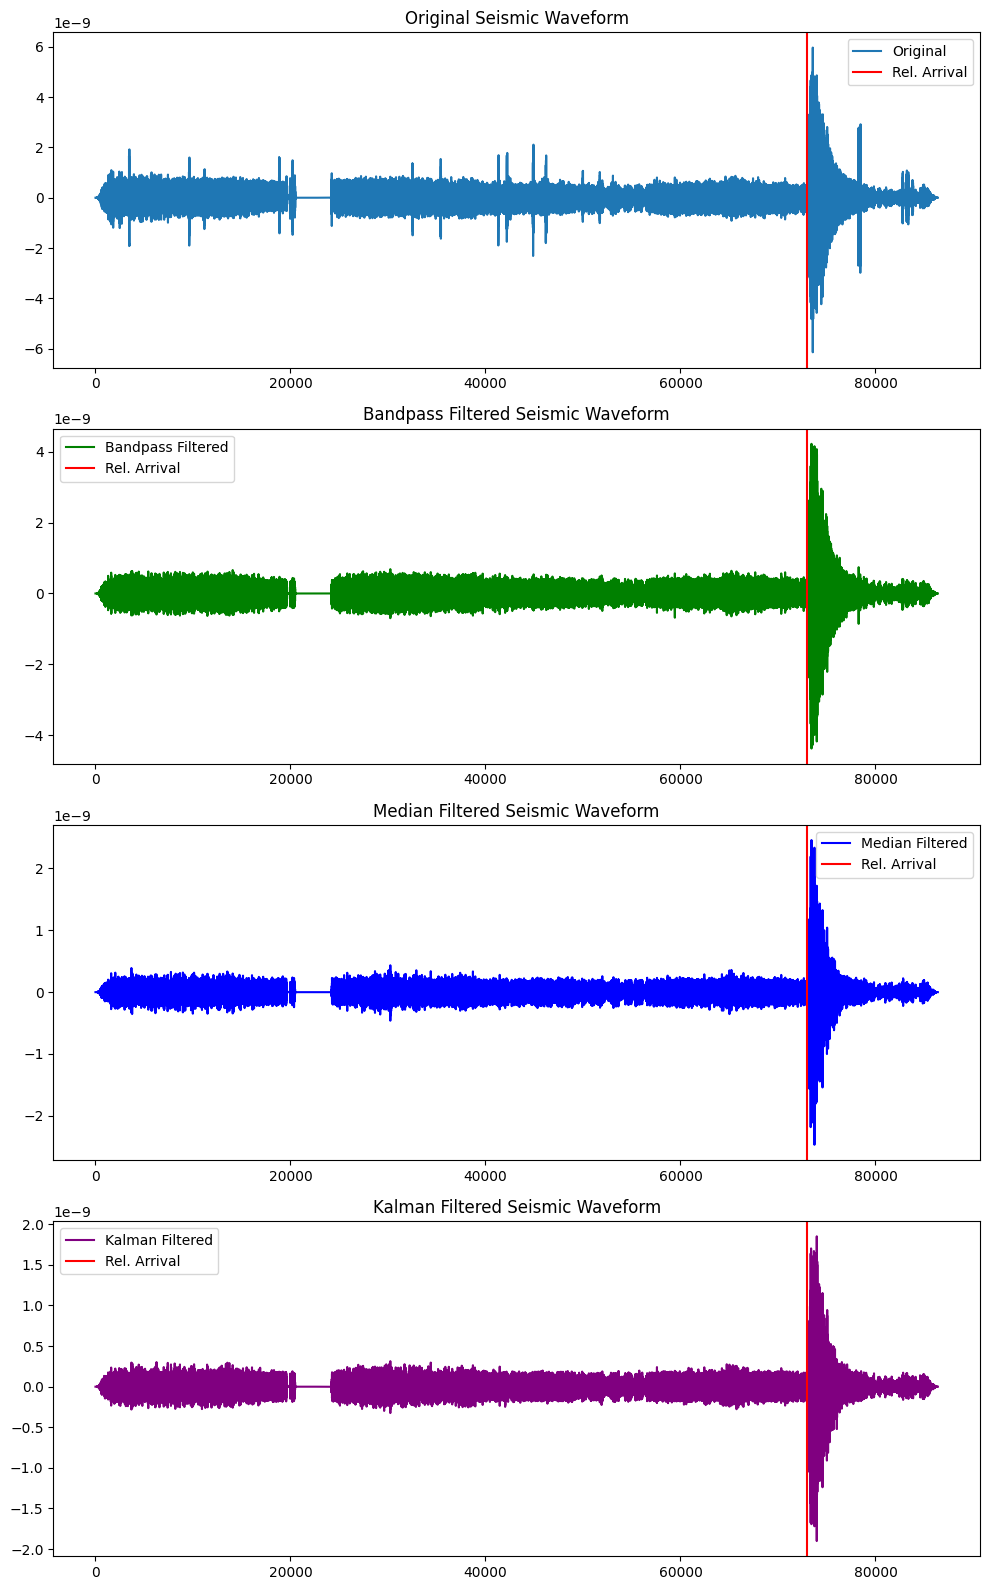

In [9]:
from scipy.signal import medfilt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os
from obspy import read, Trace, UTCDateTime
from filterpy.kalman import KalmanFilter

# 目錄和檔案設定
cat_directory = './data/lunar/training/catalogs/'
cat_file = os.path.join(cat_directory, 'apollo12_catalog_GradeA_final.csv')

# 讀取地震目錄
cat = pd.read_csv(cat_file)

# 設定處理的行數
row_count = 3 #len(cat)
print(f"總行數: {row_count}")

# 設定濾波的最小和最大頻率
minfreq = 1.5
maxfreq = 3.0
Fs = 6.625  # 取樣率
nyquist = Fs / 2
minfreq_norm = minfreq / nyquist
maxfreq_norm = maxfreq / nyquist

# 中值濾波窗口大小
window_size = 11

# 卡爾曼濾波器的初始設置
def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=2, dim_z=1)  # 2個狀態變量和1個觀測變量
    kf.x = np.array([[data[0]], [0]])    # 初始狀態 (位置和速度)
    kf.F = np.array([[1, 1], [0, 1]])    # 狀態轉移矩陣
    kf.H = np.array([[1, 0]])            # 測量矩陣
    kf.P *= 1000.                        # 初始協方差矩陣
    kf.R = 5                             # 測量噪聲協方差
    kf.Q = np.array([[1, 0], [0, 1]])    # 處理噪聲協方差
    
    filtered_data = []
    for z in data:
        kf.predict()  # 預測下一個狀態
        kf.update([z])  # 使用當前測量更新狀態
        filtered_data.append(kf.x[0][0])  # 提取濾波後的位置
    return np.array(filtered_data)

# 迴圈處理每一行
for i in range(row_count):
    print(f"處理行數: {i}")
    
    row = cat.iloc[i]
    arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], '%Y-%m-%dT%H:%M:%S.%f')
    arrival_time_rel = row['time_rel(sec)']
    test_filename = row['filename']
    print(f"檔案名稱: {test_filename}")

    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = os.path.join(data_directory, f'{test_filename}.csv')
    data_cat = pd.read_csv(csv_file)

    csv_times = np.array(data_cat['time_rel(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(m/s)'].tolist())

    # 將數據轉換為 Trace 進行 bandpass 濾波
    trace = Trace(data=csv_data)
    trace.stats.starttime = UTCDateTime(arrival_time)
    trace.stats.sampling_rate = Fs
    trace.filter('bandpass', freqmin=minfreq_norm, freqmax=maxfreq_norm)

    # 將 bandpass 濾波後的數據進行中值濾波
    median_filtered_data = medfilt(trace.data, window_size)

    # 應用卡爾曼濾波器
    kalman_filtered_data = apply_kalman_filter(median_filtered_data)

    # 畫圖
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 16))

    # 原始波形
    ax1.plot(csv_times, csv_data, label='Original')
    ax1.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    ax1.set_title('Original Seismic Waveform')
    ax1.legend()

    # Bandpass 濾波後的波形
    ax2.plot(csv_times, trace.data, label='Bandpass Filtered', color='green')
    ax2.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    ax2.set_title('Bandpass Filtered Seismic Waveform')
    ax2.legend()

    # 中值濾波後的波形
    ax3.plot(csv_times, median_filtered_data, label='Median Filtered', color='blue')
    ax3.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    ax3.set_title('Median Filtered Seismic Waveform')
    ax3.legend()

    # 卡爾曼濾波後的波形
    ax4.plot(csv_times, kalman_filtered_data, label='Kalman Filtered', color='purple')
    ax4.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    ax4.set_title('Kalman Filtered Seismic Waveform')
    ax4.legend()

    # 保存圖像
    save_path = os.path.join(data_directory, f'{test_filename}_filtered_images.png')
    plt.savefig(save_path)
    print(f"圖像已保存: {save_path}")

    plt.tight_layout()
    plt.show()


# Crop training seismic event

總行數: 3
0
73500
xa.s12.00.mhz.1970-01-19HR00_evid00002


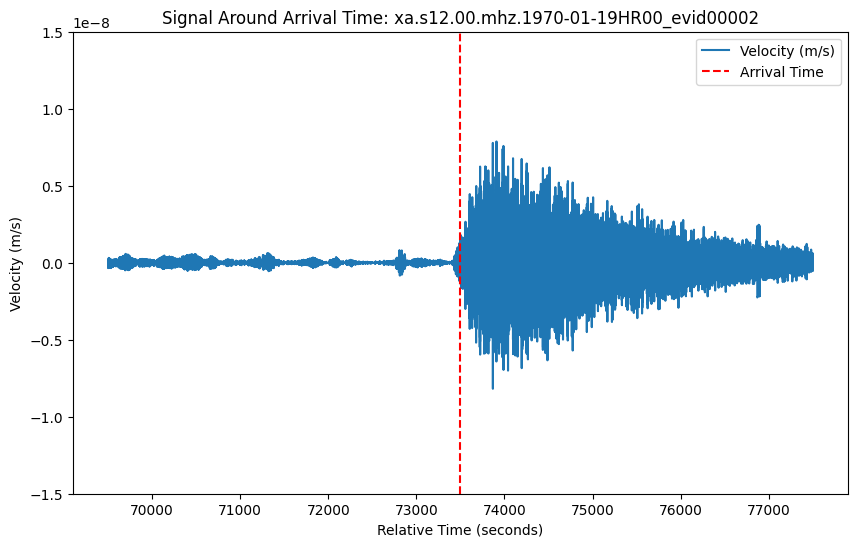

1
12720
xa.s12.00.mhz.1970-03-25HR00_evid00003


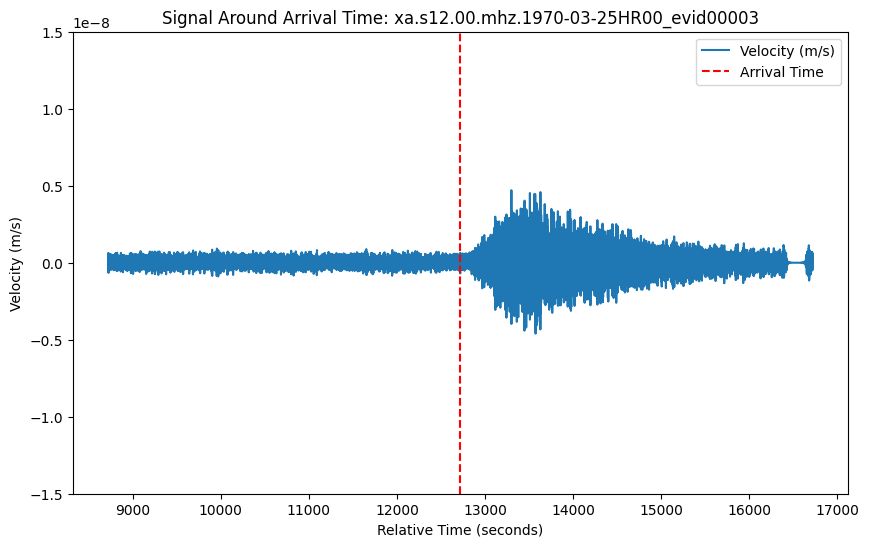

2
73020
xa.s12.00.mhz.1970-03-26HR00_evid00004


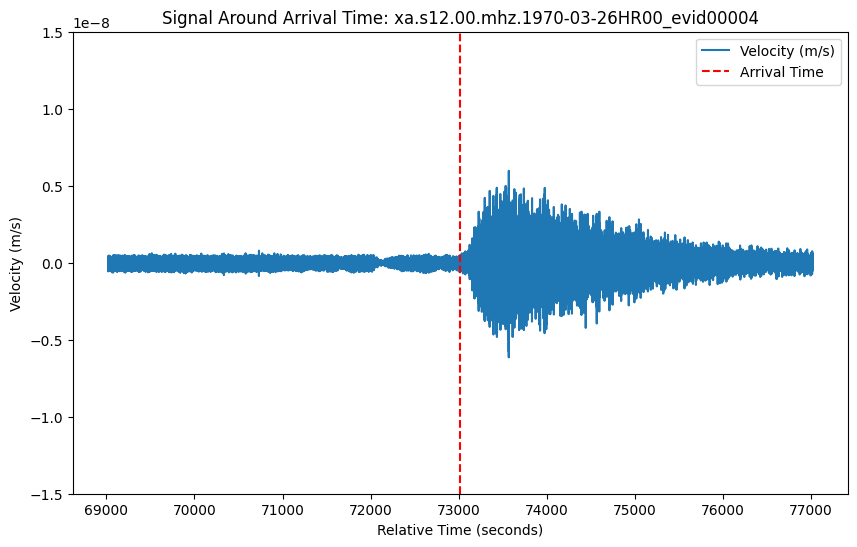

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)

row_count = 3 #len(cat)
print(f"總行數: {row_count}")

for i in range(row_count):
    print(i)
    row = cat.iloc[i]
    arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
    arrival_time_rel = row['time_rel(sec)']
    print(arrival_time_rel)

    # Get the name of the file
    test_filename = row['filename']
    print(test_filename)

    # Load the corresponding data file
    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = f'{data_directory}{test_filename}.csv'
    data_cat = pd.read_csv(csv_file)

    # Read in time steps and velocities
    csv_times = np.array(data_cat['time_rel(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(m/s)'].tolist())

    # Define the window of interest: 30 seconds before and 10 seconds after the arrival time
    start_time = arrival_time_rel - 4000
    end_time = arrival_time_rel + 4000

    # Crop the data to the desired time window
    mask = (csv_times >= start_time) & (csv_times <= end_time)
    cropped_times = csv_times[mask]
    cropped_data = csv_data[mask]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(cropped_times, cropped_data, label='Velocity (m/s)')
    
    # Mark the arrival time
    plt.axvline(x=arrival_time_rel, color='r', linestyle='--', label='Arrival Time')
    
    # Set axis labels and title
    plt.xlabel('Relative Time (seconds)')
    plt.ylabel('Velocity (m/s)')
    plt.title(f'Signal Around Arrival Time: {test_filename}')
    
    # # Fix y-axis range
    plt.ylim([-15e-9, 15e-9])

    # Add legend
    plt.legend()

    # Save the figure as an image
    # output_directory = './output_images/'
    # output_filename = f'{output_directory}{test_filename}_cropped_signal.png'
    # plt.savefig(output_filename)
    # print(f"Saved image to {output_filename}")

    # Show the plot (optional)
    plt.show()


# Visualize Training data (compress data and random shift, noise injection)

In [11]:
import pandas as pd
import numpy as np
import hashlib
import os
import matplotlib.pyplot as plt
from scipy.signal import stft
import cv2

# 初始化必要的目录路径
cat_directory = './data/lunar/training/catalogs/'
cat_file = os.path.join(cat_directory, 'apollo12_catalog_GradeA_final.csv')
data_directory = './data/lunar/training/data/S12_GradeA/'
output_directory = './data/lunar/training/output/'

# 确保输出目录存在
os.makedirs(output_directory, exist_ok=True)

# 读取目录文件
cat = pd.read_csv(cat_file)
row_count = 1
print(f"總行數: {row_count}")

# 创建一个字典来存储波形数据的哈希值和对应的文件信息
hash_to_data = {}

for i in range(row_count):
    print(f"Processing row {i}")
    row = cat.iloc[i]
    arrival_time_rel = row['time_rel(sec)']
    test_filename = row['filename']
    print(f"Filename: {test_filename}, Arrival Time: {arrival_time_rel}")

    # 读取数据文件
    csv_file = os.path.join(data_directory, f'{test_filename}.csv')
    data_cat = pd.read_csv(csv_file)

    # 提取时间和速度数据
    csv_times = data_cat['time_rel(sec)'].values
    csv_data = data_cat['velocity(m/s)'].values

    # 计算波形数据的哈希值
    data_hash = hashlib.sha256(csv_data.tobytes()).hexdigest()

    # 将文件信息添加到字典中
    if data_hash not in hash_to_data:
        hash_to_data[data_hash] = {
            'csv_times': csv_times,
            'csv_data': csv_data,
            'arrival_times': [],
            'num_waves': 0,
            'npy_file': '',  # 稍后填充
            'original_npy_file': '',  # 原始数据文件路径
        }
    hash_to_data[data_hash]['arrival_times'].append(arrival_time_rel)
    hash_to_data[data_hash]['num_waves'] = len(hash_to_data[data_hash]['arrival_times'])

# 准备收集所有元数据的列表
metadata_records = []

# 遍历哈希字典，进行数据增强、绘图并保存波形到 npy 文件
for data_hash, info in hash_to_data.items():
    print(f"Processing data for data_hash: {data_hash}")

    csv_times = info['csv_times']
    csv_data = info['csv_data']
    arrival_times = info['arrival_times']

    # 保存原始波形数据到 npy 文件
    original_npy_filename = f'{data_hash}_original.npy'
    original_npy_filepath = os.path.join(output_directory, original_npy_filename)
    np.save(original_npy_filepath, np.vstack((csv_times, csv_data)))
    info['original_npy_file'] = original_npy_filepath

    # 进行10次数据增强和噪声注入
    for augment_idx in range(10):
        print(f"Augmenting {augment_idx + 1}/10")

        # 数据增强：将整个波形分成10段，包括到达时间段
        N = 10  # 分段数量
        segment_indices = np.linspace(0, len(csv_times), num=N+1, dtype=int)
        segments = []

        for i in range(N):
            seg_start = segment_indices[i]
            seg_end = segment_indices[i + 1]
            segment_times = csv_times[seg_start:seg_end]
            segment_data = csv_data[seg_start:seg_end]
            segment_arrival_time_offsets = []

            # 检查到达时间是否在该段中
            for arrival_time in arrival_times:
                if segment_times[0] <= arrival_time <= segment_times[-1]:
                    arrival_time_offset = arrival_time - segment_times[0]
                    segment_arrival_time_offsets.append(arrival_time_offset)
            
            segment = {
                'times': segment_times,
                'data': segment_data,
                'arrival_time_offsets': segment_arrival_time_offsets,
                'length': len(segment_times)
            }
            segments.append(segment)

        # 随机打乱这些段
        np.random.shuffle(segments)

        # 重建增强后的波形数据和时间轴
        dt = np.mean(np.diff(csv_times))  # 假设采样间隔是恒定的
        augmented_data = []
        augmented_times = []
        new_arrival_times = []
        cumulative_time = 0

        for segment in segments:
            segment_length = segment['length']
            # 重新生成该段的时间轴，保证时间连续
            adjusted_times = np.arange(segment_length) * dt + cumulative_time
            augmented_times.append(adjusted_times)
            augmented_data.append(segment['data'])

            # 计算新的到达时间
            for arrival_time_offset in segment['arrival_time_offsets']:
                new_arrival_time = cumulative_time + arrival_time_offset
                new_arrival_times.append(new_arrival_time)

            cumulative_time += segment_length * dt

        # 将段的数据和时间轴拼接起来
        augmented_times = np.concatenate(augmented_times)
        augmented_data = np.concatenate(augmented_data)

        # Noise Injection: Add random noise to the data
        noise = np.random.normal(0, np.std(augmented_data) * 0.01, size=augmented_data.shape)
        augmented_data_with_noise = augmented_data + noise

        # 保留到达时间前 x 秒，后 y 秒的范围，x + y = 8000
        x = np.random.uniform(2000, 6000)  # 随机生成 x 的值
        y = 8000 - x  # 确保 x + y = 8000
        start_time = new_arrival_times[0] - x
        end_time = new_arrival_times[0] + y

        mask = (augmented_times >= start_time) & (augmented_times <= end_time)
        final_augmented_times = augmented_times[mask]
        final_augmented_data = augmented_data_with_noise[mask]
        final_arrival_times = [arrival for arrival in new_arrival_times if start_time <= arrival <= end_time]

        # 捨棄有多個到達時間的段落
        if len(final_arrival_times) != 1:
            print(f"Skipping augmentation {augment_idx + 1} due to multiple arrival times")
            continue

        # STFT 计算
        sampling_rate = 6.625  # 使用 6.625Hz 的采样率
        f, t, Zxx = stft(final_augmented_data, fs=sampling_rate, nperseg=256)

        # 将到达时间映射到裁剪后的时间范围，并映射到 STFT 的时间轴
        arrival_time_in_stft = final_arrival_times[0] - final_augmented_times[0]
        time_index = np.argmin(np.abs(t - arrival_time_in_stft))  # 找到映射到 STFT 时间轴的索引

        # 转换为幅度谱
        Zxx_magnitude = np.abs(Zxx)

        # Normalize the STFT result to range [0, 255] and convert to uint8
        Zxx_magnitude_normalized = cv2.normalize(Zxx_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Apply a colormap to convert the grayscale image into a color image
        stft_colored = cv2.applyColorMap(Zxx_magnitude_normalized, cv2.COLORMAP_JET)

        # # Add a vertical line at the arrival time position
        # cv2.line(stft_colored, (time_index, 0), (time_index, stft_colored.shape[0]), (0, 0, 255), 2)

        # # Add text label for the arrival time
        # cv2.putText(stft_colored, 'Arrival Time', (time_index + 10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        # Save the colored STFT image with arrival time marked
        stft_image_filename = f'{data_hash}_stft_{augment_idx + 1}.png'
        stft_image_filepath = os.path.join(output_directory, stft_image_filename)
        cv2.imwrite(stft_image_filepath, stft_colored)

        # 保存增强后的 STFT 图像的元数据
        metadata_record = {
            'data_hash': data_hash,
            'augmented_npy_file': f'{data_hash}_augmented_{augment_idx + 1}.npy',
            'stft_image_file': stft_image_filepath,
            'num_waves': info['num_waves'],
            'new_arrival_times': ','.join(map(str, final_arrival_times)),
            'x': x,
            'y': y
        }
        metadata_records.append(metadata_record)

# 将所有元数据转换为 DataFrame
df_metadata = pd.DataFrame(metadata_records)

# 保存所有元数据到一个 CSV 文件
metadata_csv_file = os.path.join(output_directory, 'metadata.csv')
df_metadata.to_csv(metadata_csv_file, index=False)
print(f"所有元数据已保存到 {metadata_csv_file}")


總行數: 1
Processing row 0
Filename: xa.s12.00.mhz.1970-01-19HR00_evid00002, Arrival Time: 73500
Processing data for data_hash: 94ba4e7e1c5b46b2f185a55f857115ae8d1ec8e1d8b3970df5fde1d681b278b7
Augmenting 1/10
Augmenting 2/10
Augmenting 3/10
Augmenting 4/10
Augmenting 5/10
Augmenting 6/10
Augmenting 7/10
Augmenting 8/10
Augmenting 9/10
Augmenting 10/10
所有元数据已保存到 ./data/lunar/training/output/metadata.csv


In [12]:
# 准备收集所有元数据的列表
no_wave_metadata_records = []

# 遍历哈希字典，进行数据增强、绘图并保存无震波的 STFT 图像
for data_hash, info in hash_to_data.items():
    print(f"Processing no-wave data for data_hash: {data_hash}")

    csv_times = info['csv_times']
    csv_data = info['csv_data']

    # 进行10次数据增强和噪声注入
    for augment_idx in range(10):
        print(f"Augmenting no-wave {augment_idx + 1}/10")

        # 数据增强：将整个波形分成10段
        N = 10  # 分段数量
        segment_indices = np.linspace(0, len(csv_times), num=N+1, dtype=int)
        segments = []

        for i in range(N):
            seg_start = segment_indices[i]
            seg_end = segment_indices[i + 1]
            segment_times = csv_times[seg_start:seg_end]
            segment_data = csv_data[seg_start:seg_end]
            segment = {
                'times': segment_times,
                'data': segment_data,
                'length': len(segment_times)
            }
            segments.append(segment)

        # 随机打乱这些段
        np.random.shuffle(segments)

        # 重建增强后的波形数据和时间轴
        dt = np.mean(np.diff(csv_times))  # 假设采样间隔是恒定的
        augmented_data = []
        augmented_times = []
        cumulative_time = 0

        for segment in segments:
            segment_length = segment['length']
            # 重新生成该段的时间轴，保证时间连续
            adjusted_times = np.arange(segment_length) * dt + cumulative_time
            augmented_times.append(adjusted_times)
            augmented_data.append(segment['data'])

            cumulative_time += segment_length * dt

        # 将段的数据和时间轴拼接起来
        augmented_times = np.concatenate(augmented_times)
        augmented_data = np.concatenate(augmented_data)

        # Noise Injection: Add random noise to the data
        noise = np.random.normal(0, np.std(augmented_data) * 0.01, size=augmented_data.shape)
        augmented_data_with_noise = augmented_data + noise

        # 随机裁剪没有震波的片段，确保时长为 8000
        x = np.random.uniform(2000, 6000)  # 随机生成 x 的值
        y = 8000 - x  # 确保 x + y = 8000
        start_time = np.random.uniform(augmented_times[0], augmented_times[-1] - (x + y))
        end_time = start_time + x + y

        mask = (augmented_times >= start_time) & (augmented_times <= end_time)
        final_augmented_times = augmented_times[mask]
        final_augmented_data = augmented_data_with_noise[mask]

        # STFT 计算
        sampling_rate = 6.625  # 使用 6.625Hz 的采样率
        f, t, Zxx = stft(final_augmented_data, fs=sampling_rate, nperseg=256)

        # 转换为幅度谱
        Zxx_magnitude = np.abs(Zxx)

        # Normalize the STFT result to range [0, 255] and convert to uint8
        Zxx_magnitude_normalized = cv2.normalize(Zxx_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Apply a colormap to convert the grayscale image into a color image
        stft_colored = cv2.applyColorMap(Zxx_magnitude_normalized, cv2.COLORMAP_JET)

        # Save the colored STFT image without any seismic waves
        stft_image_filename = f'{data_hash}_no_wave_stft_{augment_idx + 1}.png'
        stft_image_filepath = os.path.join(output_directory, stft_image_filename)
        cv2.imwrite(stft_image_filepath, stft_colored)

        # 保存无震波 STFT 图像的元数据
        no_wave_metadata_record = {
            'data_hash': data_hash,
            'stft_image_file': stft_image_filepath,
            'x': x,
            'y': y,
        }
        no_wave_metadata_records.append(no_wave_metadata_record)

# 将所有无震波的元数据转换为 DataFrame
df_no_wave_metadata = pd.DataFrame(no_wave_metadata_records)

# 保存所有无震波的元数据到一个 CSV 文件
no_wave_metadata_csv_file = os.path.join(output_directory, 'no_wave_metadata.csv')
df_no_wave_metadata.to_csv(no_wave_metadata_csv_file, index=False)
print(f"所有无震波元数据已保存到 {no_wave_metadata_csv_file}")


Processing no-wave data for data_hash: 94ba4e7e1c5b46b2f185a55f857115ae8d1ec8e1d8b3970df5fde1d681b278b7
Augmenting no-wave 1/10
Augmenting no-wave 2/10
Augmenting no-wave 3/10
Augmenting no-wave 4/10
Augmenting no-wave 5/10
Augmenting no-wave 6/10
Augmenting no-wave 7/10
Augmenting no-wave 8/10
Augmenting no-wave 9/10
Augmenting no-wave 10/10
所有无震波元数据已保存到 ./data/lunar/training/output/no_wave_metadata.csv
